In [ ]:
import pandas as pd

In [ ]:
file_path = "/content/2023-10-07-2025-01-28-Israel-Palestine.csv"
df = pd.read_csv(file_path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37133 entries, 0 to 37132
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   event_id_cnty       37133 non-null  object 
 1   event_date          37133 non-null  object 
 2   year                37133 non-null  int64  
 3   time_precision      37133 non-null  int64  
 4   disorder_type       37133 non-null  object 
 5   event_type          37133 non-null  object 
 6   sub_event_type      37133 non-null  object 
 7   actor1              37133 non-null  object 
 8   assoc_actor_1       5024 non-null   object 
 9   inter1              37133 non-null  object 
 10  actor2              25567 non-null  object 
 11  assoc_actor_2       4454 non-null   object 
 12  inter2              25567 non-null  object 
 13  interaction         37133 non-null  object 
 14  civilian_targeting  10341 non-null  object 
 15  iso                 37133 non-null  int64  
 16  regi

In [ ]:
df.head()

,event_id_cnty,event_date,year,time_precision,disorder_type,event_type,sub_event_type,actor1,assoc_actor_1,inter1,...,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,tags,timestamp,population_best
0,ISR45037,24 January 2025,2025,1,Demonstrations,Riots,Violent demonstration,Rioters (Israel),NaN,Rioters,...,32.0809,34.7806,1,Haaretz; Times of Israel; Walla!News,National,"On 24 January 2025, dozens of relatives of hos...",0,crowd size=dozens,1738026279,27002.0
1,ISR45039,24 January 2025,2025,1,Demonstrations,Protests,Protest with intervention,Protesters (Israel),NaN,Protesters,...,31.7690,35.2163,1,Haaretz,National,"On 24 January 2025, a protest took place near ...",0,crowd size=no report,1738026279,10988.0
2,PSE66835,24 January 2025,2025,1,Strategic developments,Strategic developments,Looting/property destruction,Settlers (Israel),Hashomer Yosh,Political militia,...,32.0547,35.2990,2,Palestine News and Information Agency,National,"Land seizure: On 24 January 2025, the leader o...",0,NaN,1738026290,NaN
3,PSE66847,24 January 2025,2025,1,Political violence,Violence against civilians,Attack,Military Forces of Israel (2022-),NaN,External/Other forces,...,31.6230,35.1371,1,Ma'an News Agency; Palestine News and Informat...,National,"On 24 January 2025, Israeli forces fired live ...",0,NaN,1738026290,3448.0
4,PSE66848,24 January 2025,2025,1,Political violence,Violence against civilians,Attack,Military Forces of Israel (2022-),NaN,External/Other forces,...,31.5294,35.0938,2,Palestine News and Information Agency,National,"On 24 January 2025, Israeli forces beat up 2 P...",0,NaN,1738026290,93889.0


In [ ]:
# Drop Unnecessary Columns First
columns_to_drop = ["event_id_cnty", "year", "timestamp", "population_best"]  # These columns are not useful for analysis
df = df.drop(columns=columns_to_drop)

In [ ]:
# Convert Data Types
df["event_date"] = pd.to_datetime(df["event_date"], errors="coerce")  # Convert event_date to datetime

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37133 entries, 0 to 37132
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   event_date          37133 non-null  datetime64[ns]
 1   time_precision      37133 non-null  int64         
 2   disorder_type       37133 non-null  object        
 3   event_type          37133 non-null  object        
 4   sub_event_type      37133 non-null  object        
 5   actor1              37133 non-null  object        
 6   assoc_actor_1       5024 non-null   object        
 7   inter1              37133 non-null  object        
 8   actor2              25567 non-null  object        
 9   assoc_actor_2       4454 non-null   object        
 10  inter2              25567 non-null  object        
 11  interaction         37133 non-null  object        
 12  civilian_targeting  10341 non-null  object        
 13  iso                 37133 non-null  int64     

In [ ]:
# Missing Values
categorical_cols = ["assoc_actor_1", "assoc_actor_2", "actor2", "inter2",
                    "civilian_targeting", "tags", "admin1", "admin2", "admin3"]
df[categorical_cols] = df[categorical_cols].fillna("Unknown")  # Fill missing categorical values with "Unknown"

In [ ]:
# Standardize Text Fields
text_columns = ["event_type", "sub_event_type", "actor1", "actor2", "region", "country", "source"]
df[text_columns] = df[text_columns].apply(lambda x: x.str.title())  # Convert text columns to title case

In [ ]:
df.head()

,event_date,time_precision,disorder_type,event_type,sub_event_type,actor1,assoc_actor_1,inter1,actor2,assoc_actor_2,...,admin3,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,tags
0,2025-01-24,1,Demonstrations,Riots,Violent Demonstration,Rioters (Israel),Unknown,Rioters,Unknown,Unknown,...,Tel Aviv,Tel Aviv,32.0809,34.7806,1,Haaretz; Times Of Israel; Walla!News,National,"On 24 January 2025, dozens of relatives of hos...",0,crowd size=dozens
1,2025-01-24,1,Demonstrations,Protests,Protest With Intervention,Protesters (Israel),Unknown,Protesters,Police Forces Of Israel (2022-),Unknown,...,Judean Mountains,Jerusalem,31.7690,35.2163,1,Haaretz,National,"On 24 January 2025, a protest took place near ...",0,crowd size=no report
2,2025-01-24,1,Strategic developments,Strategic Developments,Looting/Property Destruction,Settlers (Israel),Hashomer Yosh,Political militia,Civilians (Palestine),Unknown,...,Unknown,Shiloh,32.0547,35.2990,2,Palestine News And Information Agency,National,"Land seizure: On 24 January 2025, the leader o...",0,Unknown
3,2025-01-24,1,Political violence,Violence Against Civilians,Attack,Military Forces Of Israel (2022-),Unknown,External/Other forces,Civilians (Palestine),Refugees/IDPs (Palestine),...,Unknown,Arrub Camp,31.6230,35.1371,1,Ma'An News Agency; Palestine News And Informat...,National,"On 24 January 2025, Israeli forces fired live ...",0,Unknown
4,2025-01-24,1,Political violence,Violence Against Civilians,Attack,Military Forces Of Israel (2022-),Unknown,External/Other forces,Civilians (Palestine),Prisoners (Palestine),...,Unknown,Hebron,31.5294,35.0938,2,Palestine News And Information Agency,National,"On 24 January 2025, Israeli forces beat up 2 P...",0,Unknown


In [ ]:
import re

# Remove leading/trailing spaces
df["notes"] = df["notes"].str.strip()

# Convert to lowercase (optional, if needed for NLP processing)
df["notes"] = df["notes"].str.lower()

# Remove special characters, extra spaces, and non-alphanumeric symbols (except punctuation)
df["notes"] = df["notes"].apply(lambda x: re.sub(r"[^a-zA-Z0-9.,!? ]", "", x))

# Replace multiple spaces with a single space
df["notes"] = df["notes"].apply(lambda x: re.sub(r"\s+", " ", x))

# Handle missing values (fill with "No Details Provided" if empty)
df["notes"] = df["notes"].fillna("No Details Provided")

# Shorten long texts if needed (e.g., truncate to 500 characters)
df["notes"] = df["notes"].apply(lambda x: x[:500] if len(x) > 500 else x)

df["notes"].head()

,notes
0,"on 24 january 2025, dozens of relatives of hos..."
1,"on 24 january 2025, a protest took place near ..."
2,"land seizure on 24 january 2025, the leader of..."
3,"on 24 january 2025, israeli forces fired live ..."
4,"on 24 january 2025, israeli forces beat up 2 p..."


In [ ]:
# Remove text before the first comma
df['notes'] = df['notes'].str.replace(r'^[^,]*, ', '', regex=True)
df['notes'].head()

,notes
0,dozens of relatives of hostages demonstrated o...
1,a protest took place near the prime ministers ...
2,"the leader of hashomer yosh, accompanied by is..."
3,"israeli forces fired live bullets, tear gas ca..."
4,israeli forces beat up 2 palestinians in a mil...


In [ ]:
# Count the occurrences of each unique value in the 'disorder_type' column
data_counts = df['disorder_type'].value_counts().reset_index()
data_counts

,disorder_type,count
0,Political violence,30062
1,Strategic developments,4196
2,Demonstrations,2861
3,Political violence; Demonstrations,14


In [ ]:
data_counts = df['event_type'].value_counts().reset_index()
data_counts

,event_type,count
0,Explosions/Remote Violence,18781
1,Riots,6173
2,Strategic Developments,4196
3,Battles,3856
4,Protests,2390
5,Violence Against Civilians,1737


In [ ]:
data_counts = df['sub_event_type'].value_counts().reset_index()
data_counts

,sub_event_type,count
0,Shelling/Artillery/Missile Attack,10026
1,Air/Drone Strike,8359
2,Mob Violence,5688
3,Armed Clash,3850
4,Peaceful Protest,2198
5,Looting/Property Destruction,2112
6,Attack,1723
7,Disrupted Weapons Use,1239
8,Other,612
9,Violent Demonstration,485


In [ ]:
data_counts = df['actor1'].value_counts().reset_index()
data_counts

,actor1,count
0,Military Forces Of Israel (2022-),17678
1,Rioters (Palestine),4150
2,Hezbollah,3807
3,Hamas Movement,2291
4,Rioters (Israel),2023
...,...,...
121,Aamb: Khalil Al Maqdah Brigade,1
122,Rioters (Eritrea),1
123,Hamas: Faqqua Engineering Unit,1
124,Aamb: Katibat Al Jalazun,1


In [ ]:
data_counts = df['assoc_actor_1'].value_counts().reset_index()
data_counts

,assoc_actor_1,count
0,Unknown,32109
1,Settlers (Israel),1727
2,Refugees/IDPs (Palestine),489
3,Rioters (Palestine),258
4,PIJ: Palestinian Islamic Jihad,172
...,...,...
603,Black Flag Movement,1
604,Katibat Mukhayyam al Farah; Refugees/IDPs (Pal...,1
605,AAMB: Jenin Youth of Revenge and Liberation; H...,1
606,Government of the United States (2021-2025); H...,1


In [ ]:
data_counts = df['inter1'].value_counts().reset_index()
data_counts

,inter1,count
0,External/Other forces,16810
1,Political militia,10259
2,Rioters,6174
3,Protesters,2396
4,State forces,1397
5,Rebel group,88
6,Civilians,6
7,Identity militia,3


In [ ]:
data_counts = df['actor2'].value_counts().reset_index()
data_counts

,actor2,count
0,Civilians (Palestine),11941
1,Unknown,11566
2,Military Forces Of Israel (2022-),9834
3,Hamas Movement,1093
4,Civilians (Israel),821
...,...,...
58,Unidentified Armed Group (Syria),1
59,Unrwa: United Nations Relief And Works Agency,1
60,Unidentified Armed Group (Egypt),1
61,The Galilee Forces - Lone Wolves,1


In [ ]:
data_counts = df['assoc_actor_2'].value_counts().reset_index()
data_counts

,assoc_actor_2,count
0,Unknown,32679
1,Refugees/IDPs (Palestine),1490
2,Farmers (Palestine),909
3,Settlers (Israel),490
4,Labor Group (Palestine),212
...,...,...
262,Civilians (Palestine); Government of Palestine...,1
263,Civilians (Palestine); Farmers (Palestine); La...,1
264,Government of Palestine (2007-) Hamas Governme...,1
265,Christian Group (Palestine); Refugees/IDPs (Pa...,1


In [ ]:
data_counts = df['inter2'].value_counts().reset_index()
data_counts

,inter2,count
0,Civilians,12789
1,Unknown,11566
2,External/Other forces,8459
3,State forces,2182
4,Political militia,1930
5,Rioters,145
6,Rebel group,40
7,Protesters,19
8,Identity militia,3


In [ ]:
data_counts = df['interaction'].value_counts().reset_index()
data_counts

,interaction,count
0,External/Other forces-Civilians,9806
1,External/Other forces only,6258
2,Political militia-External/Other forces,5331
3,Rioters-External/Other forces,3734
4,State forces-Political militia,3026
5,Political militia only,2484
6,Protesters only,2186
7,Rioters-Civilians,1637
8,Political militia-Civilians,1307
9,Rioters only,498


In [ ]:
data_counts = df['civilian_targeting'].value_counts().reset_index()
data_counts

,civilian_targeting,count
0,Unknown,26792
1,Civilian targeting,10341


In [ ]:
data_counts = df['iso'].value_counts().reset_index()
data_counts

,iso,count
0,275,29457
1,376,7676


In [ ]:
data_counts = df['region'].value_counts().reset_index()
data_counts

,region,count
0,Middle East,37133


In [ ]:
data_counts = df['country'].value_counts().reset_index()
data_counts

,country,count
0,Palestine,29457
1,Israel,7676


In [ ]:
data_counts = df['admin1'].value_counts().reset_index()
data_counts

,admin1,count
0,Gaza Strip,16951
1,West Bank,12506
2,HaZafon,4188
3,HaDarom,1192
4,Tel Aviv,683
5,HaMerkaz,620
6,Haifa,617
7,Jerusalem,352
8,Unknown,24


In [ ]:
data_counts = df['admin2'].value_counts().reset_index()
data_counts

,admin2,count
0,Gaza City,5007
1,Deir El Balah,3309
2,Khan Yunis,3198
3,North Gaza,2858
4,Nablus,2602
5,Rafah,2576
6,Zefat,2140
7,Hebron,1871
8,Akko,1795
9,Ramallah and Al Bireh,1542


In [ ]:
data_counts = df['admin3'].value_counts().reset_index()
data_counts

,admin3,count
0,Unknown,29515
1,Eastern Upper Galilee,1311
2,Elon,1026
3,Hula Basin,745
4,Tel Aviv,670
5,Ashqelon,454
6,Nahariyya,441
7,Haifa,378
8,Judean Mountains,323
9,Besor,285


In [ ]:
data_counts = df['geo_precision'].value_counts().reset_index()
data_counts

,geo_precision,count
0,1,23560
1,2,13328
2,3,245


In [ ]:
data_counts = df['source'].value_counts().reset_index()
data_counts

,source,count
0,Plo Negotiations Affairs Department,5189
1,Palestine News And Information Agency,4059
2,Quds News Network,3415
3,Hezbollah War Media,1501
4,Quds News Network; Twitter,1462
...,...,...
3056,Jerusalem Post; Ma'An News Agency; Twitter,1
3057,Long War Journal; Ma'An News Agency; Newpress;...,1
3058,Islamic Resistance In Iraq - War Media; Israel...,1
3059,Al Ghad (Jordan); Arab 48; Arutz Sheva; Haaret...,1


In [ ]:
data_counts = df['source_scale'].value_counts().reset_index()
data_counts

,source_scale,count
0,National,15835
1,New media-National,6866
2,Other,5665
3,Other-National,1929
4,New media,1550
5,Local partner-New media,1246
6,Other-New media,1156
7,National-International,706
8,International,680
9,National-Regional,609


In [ ]:
data_counts = df['fatalities'].value_counts().reset_index()
data_counts

,fatalities,count
0,0,30531
1,1,1510
2,3,972
3,2,922
4,4,466
...,...,...
90,90,1
91,73,1
92,77,1
93,84,1


In [ ]:
data_counts = df['tags'].value_counts().reset_index()
data_counts

,tags,count
0,Unknown,28548
1,crowd size=no report,7231
2,crowd size=dozens,374
3,crowd size=hundreds,264
4,crowd size=thousands,155
...,...,...
127,crowd size=1500,1
128,crowd size=around 3,1
129,crowd size=about 1000,1
130,crowd size=over 20,1


In [ ]:
data_counts = df['location'].value_counts().reset_index()
data_counts

,location,count
0,Gaza - Az Zaytun,795
1,Bani Suheila,692
2,Gaza - Shujaiyya,685
3,Jabalya Camp,624
4,Al Burayj,579
...,...,...
1222,Beit Mirsim,1
1223,Maghar,1
1224,Mitzpe Yericho,1
1225,Nahal Milcha,1


In [ ]:
# Drop the column "region"
df = df.drop(columns=["region", "iso"], errors="ignore")
df.head()

,event_date,time_precision,disorder_type,event_type,sub_event_type,actor1,assoc_actor_1,inter1,actor2,assoc_actor_2,...,admin3,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,tags
0,2025-01-24,1,Demonstrations,Riots,Violent Demonstration,Rioters (Israel),Unknown,Rioters,Unknown,Unknown,...,Tel Aviv,Tel Aviv,32.0809,34.7806,1,Haaretz; Times Of Israel; Walla!News,National,dozens of relatives of hostages demonstrated o...,0,crowd size=dozens
1,2025-01-24,1,Demonstrations,Protests,Protest With Intervention,Protesters (Israel),Unknown,Protesters,Police Forces Of Israel (2022-),Unknown,...,Judean Mountains,Jerusalem,31.7690,35.2163,1,Haaretz,National,a protest took place near the prime ministers ...,0,crowd size=no report
2,2025-01-24,1,Strategic developments,Strategic Developments,Looting/Property Destruction,Settlers (Israel),Hashomer Yosh,Political militia,Civilians (Palestine),Unknown,...,Unknown,Shiloh,32.0547,35.2990,2,Palestine News And Information Agency,National,"the leader of hashomer yosh, accompanied by is...",0,Unknown
3,2025-01-24,1,Political violence,Violence Against Civilians,Attack,Military Forces Of Israel (2022-),Unknown,External/Other forces,Civilians (Palestine),Refugees/IDPs (Palestine),...,Unknown,Arrub Camp,31.6230,35.1371,1,Ma'An News Agency; Palestine News And Informat...,National,"israeli forces fired live bullets, tear gas ca...",0,Unknown
4,2025-01-24,1,Political violence,Violence Against Civilians,Attack,Military Forces Of Israel (2022-),Unknown,External/Other forces,Civilians (Palestine),Prisoners (Palestine),...,Unknown,Hebron,31.5294,35.0938,2,Palestine News And Information Agency,National,israeli forces beat up 2 palestinians in a mil...,0,Unknown


In [ ]:
cleaned_file_path = "/content/Cleaned_Israel_Palestine_Data.csv"
df.to_csv(cleaned_file_path, index=False)

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

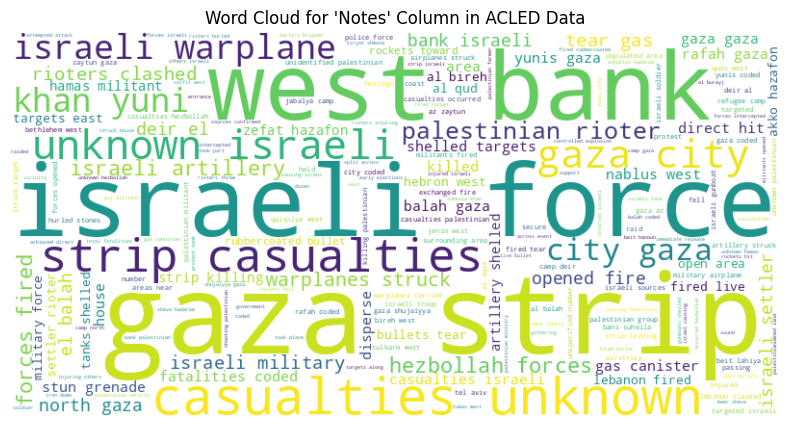

In [ ]:
text_data = " ".join(str(note) for note in df['notes'].dropna())


wordcloud = WordCloud(width=800, height=400, background_color="white", colormap="viridis").generate(text_data)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud for 'Notes' Column in ACLED Data")
plt.show()